<a href="https://www.kaggle.com/code/tammysilva/phys243-hw2-jiaxin-tang?scriptVersionId=92857714" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 0 Load packages, load data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-and-code-dataset/CoffeeAndCodeLT2018 - CoffeeAndCodeLT2018.csv


In [2]:
df = pd.read_csv('../input/coffee-and-code-dataset/CoffeeAndCodeLT2018 - CoffeeAndCodeLT2018.csv')

# 1 Data exploration

In [3]:
df.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CodingHours          100 non-null    int64 
 1   CoffeeCupsPerDay     100 non-null    int64 
 2   CoffeeTime           100 non-null    object
 3   CodingWithoutCoffee  100 non-null    object
 4   CoffeeType           99 non-null     object
 5   CoffeeSolveBugs      100 non-null    object
 6   Gender               100 non-null    object
 7   Country              100 non-null    object
 8   AgeRange             98 non-null     object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

CodingHours            0
CoffeeCupsPerDay       0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeType             1
CoffeeSolveBugs        0
Gender                 0
Country                0
AgeRange               2
dtype: int64

In [6]:
df.nunique()

CodingHours            10
CoffeeCupsPerDay        8
CoffeeTime              7
CodingWithoutCoffee     3
CoffeeType              8
CoffeeSolveBugs         3
Gender                  2
Country                 1
AgeRange                5
dtype: int64

# 2 Data Visualization
## 2.1 Numerical features visualization

In [7]:
df[['CodingHours', 'CoffeeCupsPerDay']].describe()

,CodingHours,CoffeeCupsPerDay
count,100.000000,100.000000
mean,6.410000,2.890000
std,2.644205,1.613673
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,2.500000
75%,8.000000,4.000000
max,10.000000,8.000000


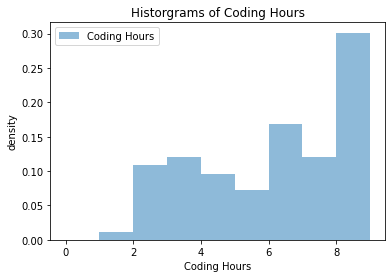

In [8]:
plt.hist(df['CodingHours'],bins=range(0,10,1),label='Coding Hours',density=True,alpha=0.5)
plt.title('Historgrams of Coding Hours')
plt.legend(loc='upper left')
plt.xlabel('Coding Hours')
plt.ylabel('density')
plt.show()

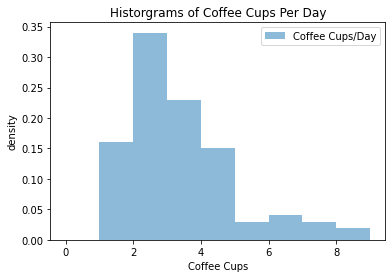

In [9]:
plt.hist(df['CoffeeCupsPerDay'],bins=range(0,10,1),label='Coffee Cups/Day',density=True,alpha=0.5)
plt.title('Historgrams of Coffee Cups Per Day')
plt.legend(loc='upper right')
plt.xlabel('Coffee Cups')
plt.ylabel('density')
plt.show()

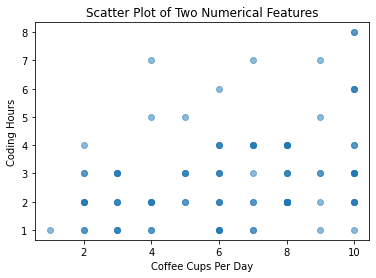

In [10]:
plt.scatter(df['CodingHours'], df['CoffeeCupsPerDay'], alpha=0.5)
plt.title("Scatter Plot of Two Numerical Features")
plt.xlabel("Coffee Cups Per Day")
plt.ylabel("Coding Hours")
plt.show()
#plt.plot(df['CoffeeCupsPerDay'],df['CodingHours'], ".", alpha=0.5)
#plt.axis([0, 9, 0, 11])

<AxesSubplot:>

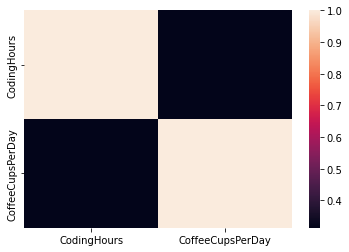

In [11]:
# correlations between two numerical features
corr_score = df[['CodingHours','CoffeeCupsPerDay']].corr()
# show heapmap of correlations
sns.heatmap(corr_score)

In [12]:
corr_score

,CodingHours,CoffeeCupsPerDay
CodingHours,1.000000,0.313692
CoffeeCupsPerDay,0.313692,1.000000


## 2.2 Categorical features visualization

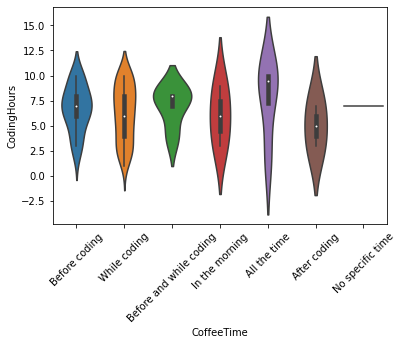

While coding               61
Before coding              25
Before and while coding     4
All the time                4
In the morning              3
After coding                2
No specific time            1
Name: CoffeeTime, dtype: int64


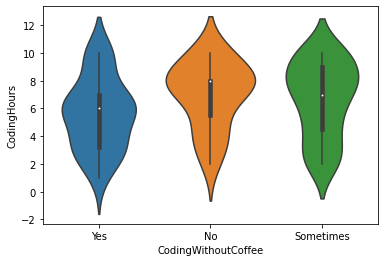

Sometimes    51
Yes          30
No           19
Name: CodingWithoutCoffee, dtype: int64


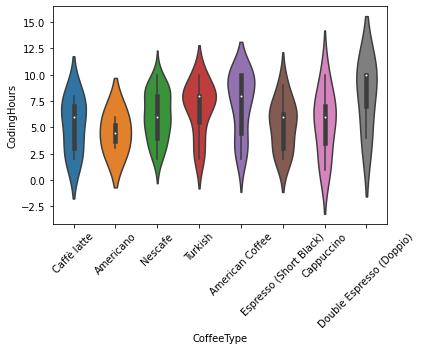

Nescafe                     32
American Coffee             23
Turkish                     19
Espresso (Short Black)       8
Cappuccino                   7
Caffè latte                  5
Double Espresso (Doppio)     3
Americano                    2
Name: CoffeeType, dtype: int64


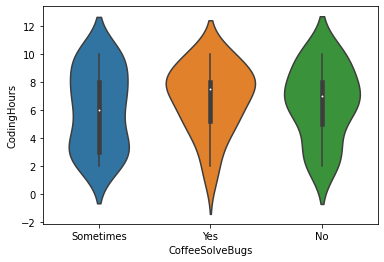

Sometimes    43
Yes          30
No           27
Name: CoffeeSolveBugs, dtype: int64


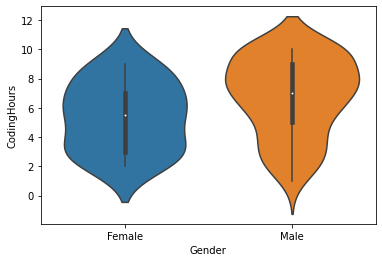

Male      74
Female    26
Name: Gender, dtype: int64


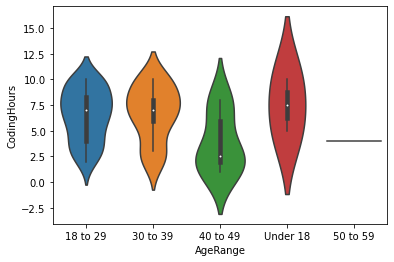

18 to 29    60
30 to 39    29
40 to 49     6
Under 18     2
50 to 59     1
Name: AgeRange, dtype: int64


In [13]:
sns.violinplot(x='CoffeeTime', y='CodingHours', data=df)
plt.xticks(rotation=45)
plt.show()
print(df['CoffeeTime'].value_counts())

sns.violinplot(x='CodingWithoutCoffee', y='CodingHours', data=df)
plt.show()
print(df['CodingWithoutCoffee'].value_counts())

sns.violinplot(x='CoffeeType', y='CodingHours', data=df)
plt.xticks(rotation=45)
plt.show()
print(df['CoffeeType'].value_counts())

sns.violinplot(x='CoffeeSolveBugs', y='CodingHours', data=df)
plt.show()
print(df['CoffeeSolveBugs'].value_counts())

sns.violinplot(x='Gender', y='CodingHours', data=df)
plt.show()
print(df['Gender'].value_counts())

sns.violinplot(x='AgeRange', y='CodingHours', data=df)
plt.show()
print(df['AgeRange'].value_counts())

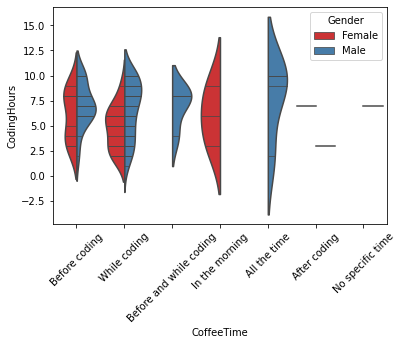

In [14]:
sns.violinplot(x='CoffeeTime', y='CodingHours', data=df, hue="Gender",
                    palette="Set1", split=True, inner="stick")
plt.xticks(rotation=45)
plt.show()

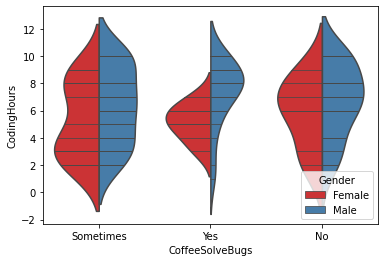

In [15]:
sns.violinplot(x='CoffeeSolveBugs', y='CodingHours', data=df, hue="Gender",
                    palette="Set1", split=True, inner="stick")
plt.show()

## 2.3 Feature masking

Text(0, 0.5, 'Coding Hours')

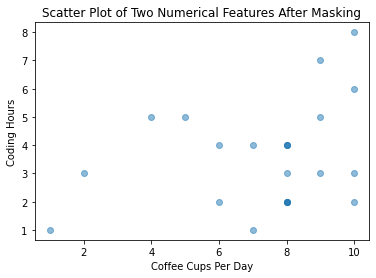

In [16]:
#imposed a mask to improve the trend of the two numerical features
mask = (df['CoffeeSolveBugs']=="Yes") & (df['Gender']=="Male") #& (df['AgeRange']=="18 to 29")
X_mask = df['CoffeeCupsPerDay'][mask]
y_mask = df['CodingHours'][mask]
plt.figure()
plt.scatter(y_mask, X_mask, alpha=0.5)
plt.title("Scatter Plot of Two Numerical Features After Masking")
plt.xlabel("Coffee Cups Per Day")
plt.ylabel("Coding Hours")

# 3 Model training

In [17]:
#split data into training dataset and testing dataset
#from sklearn import model_selection
#X = df['CoffeeCupsPerDay']
#y = df['CodingHours']
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=3)
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X_mask, y_mask, test_size=0.2, random_state=3)

#print('training data has ' + str(X_train.shape[0]) + ' observation')
#print('test data has ' + str(X_test.shape[0]) + ' observation')

## 3.1 Used linear regression

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#lin_reg.fit(X_train.values.reshape(-1,1), y_train)#(n_samples,n_features=1)
lin_reg.fit(X_mask.values.reshape(-1,1), y_mask)

LinearRegression()

In [19]:
print("The intercept of the linear model:",  lin_reg.intercept_)
print("The slope of the linear model:",  lin_reg.coef_)

The intercept of the linear model: 5.920897284533648
The slope of the linear model: [0.40023613]


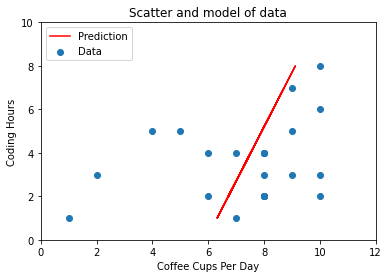

In [20]:
plt.plot(lin_reg.predict(X_mask.values.reshape(-1,1)), X_mask, "-", color="r", label="Prediction")
plt.scatter(y_mask, X_mask, label="Data")

plt.title("Scatter and model of data")
plt.xlabel("Coffee Cups Per Day")
plt.ylabel("Coding Hours")
plt.legend(fontsize = 10, loc='upper left')
plt.axis([0, 12, 0, 10])
plt.show()

In [21]:
lin_reg.score(X_mask.values.reshape(-1,1), y_mask)

0.09130554994986662

## 3.3 Used gradient descent to approach minimal loss

In [22]:
#initial weights
w1 = 0
w0 = 0

L = 0.0001  #learning Rate
epochs = 10000  #the number of iterations to perform gradient descent

n = float(len(X_mask)) #number of elements in X

#performing Gradient Descent 
for i in range(epochs): 
    Y_pred = w1*X_mask + w0  #current predicted value of Y
    D_w1 = (-2/n) * sum(X_mask* (y_mask - Y_pred))  #derivative wrt w1
    D_w0 = (-2/n) * sum(y_mask - Y_pred)  #derivative wrt w0
    w1 = w1 - L * D_w1  #update w1
    w0 = w0 - L * D_w0  #update w0
    
print (w1, w0)

1.2575661780819931 2.1403292658031012


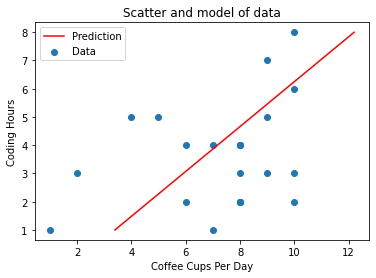

In [23]:
# Making predictions
Y_pred = w1*X_mask + w0

plt.scatter(y_mask, X_mask, label="Data") 
plt.plot([min(Y_pred), max(Y_pred)], [min(X_mask), max(X_mask)], color='r', label="Prediction")  # regression line
plt.title("Scatter and model of data")
plt.xlabel("Coffee Cups Per Day")
plt.ylabel("Coding Hours")
plt.legend(fontsize = 10, loc='upper left')

plt.show()

In [24]:
# Measure performance with MES and EMSE
from sklearn.metrics import  mean_squared_error
MSE_lin=mean_squared_error(y_mask,Y_pred)
RMSE_lin=np.sqrt(MSE_lin)
print ('Mean square error of lasso: ', MSE_lin)
print ('Root mean squared error of lasso:', RMSE_lin)

Mean square error of lasso:  7.983070163807013
Root mean squared error of lasso: 2.82543273921129


In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=10000, 
                       tol=-np.infty, 
                       penalty=None, 
                       eta0=0.1, 
                       random_state=88)
sgd_reg.fit(X_mask.values.reshape(-1,1), y_mask.ravel())

SGDRegressor(eta0=0.1, max_iter=10000, penalty=None, random_state=88, tol=-inf)

In [26]:
sgd_reg_optimal = SGDRegressor(max_iter=10000, 
                             tol=-np.infty, 
                             penalty=None,
                             loss="squared_loss", 
                             early_stopping=True, 
                             learning_rate="optimal",
                             random_state=88)

sgd_reg_optimal.fit(X_mask.values.reshape(-1,1), y_mask.ravel())

SGDRegressor(early_stopping=True, learning_rate='optimal', max_iter=10000,
             penalty=None, random_state=88, tol=-inf)

In [27]:
sgd_reg_valid = SGDRegressor(max_iter=10000, 
                             tol=-np.infty, 
                             penalty=None,
                             loss="squared_loss", 
                             early_stopping=True, 
                             learning_rate="adaptive", 
                             validation_fraction=0.1,
                             random_state=88)

sgd_reg_valid.fit(X_mask.values.reshape(-1,1), y_mask.ravel())

SGDRegressor(early_stopping=True, learning_rate='adaptive', max_iter=10000,
             penalty=None, random_state=88, tol=-inf)

In [28]:
print("Intercept: ", sgd_reg.intercept_, "Coefficient: ", sgd_reg.coef_, "with SGD from skit-learn")
print("Intercept: ", sgd_reg_valid.intercept_, "Coefficient: ", sgd_reg_valid.coef_, "with SGD with validations from skit-learn")
print("Intercept: ", sgd_reg_optimal.intercept_, "Coefficient: ", sgd_reg_optimal.coef_, "with Optimal SGD from skit-learn")

print("Intercept: ", w0, "Coefficient: ", w1, "with Analytical")

Intercept:  [5.90435648] Coefficient:  [0.39618204] with SGD from skit-learn
Intercept:  [6.633662] Coefficient:  [0.27595058] with SGD with validations from skit-learn
Intercept:  [6.9220646] Coefficient:  [0.28938921] with Optimal SGD from skit-learn
Intercept:  2.1403292658031012 Coefficient:  1.2575661780819931 with Analytical


# 4 Real world constrains

I think the real world constrains for the coding hours would be impossibly infinitely increased in reality, people need to sleep and eat after working for a certain amount of time. On the other hand, whether the coding is done in one block or multiple blocks throughout the day matters because the time of the day has an effect on the coding proficiency, and likewise, for the cups of coffee, whether the person drink in one time or multiple times matters too. Also, the source of the coffee because this relates to the quality of the coffee.
I will request the source of the coffee, the specific location of having coffee, the day of the week and the specific time of having coffee, etc. For instance, the locations/environment such as office or home would be related to the coding hours.